# Basic SIR Model

This notebook will cover the basic SIR model, along with some plotting.

First we import and initialize some parameters.

In [108]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import mpld3
mpld3.enable_notebook()

In [109]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('figure', figsize=(13, 8))  
plt.rc('lines', linewidth=2)  

Now we code the model. 

The SIR model is rather simple. Susceptibles (S) become infected (I), then infected people recover (R). These are our dependent variables; the ones we seek.

People flow from S to I to R. Each flow is the product of three things: rate * population * probability. 

The infection flow consists of the daily infection rate, the population of people that can be infected (susceptible), and the probability that the susceptibles will be infected (will meet an infected, infected/population). The recovery flow consists also of three parts: the recovery rate, the population of people who can recover (infected), and the probability that an infected will recover, which is 1 because in SIR model all infected will eventually recover. 

Next, we put it in terms of differential. S will only decrease due to infection flow, so S = -infection_flow. I will increase from infection flow but decrease from recovery flow, so I = infection_flow - recovery_flow. R will only increase from recovery flow, so R = recovery_flow.

So now we have more variables: t, population, infection_rate, and recovery_rate. They affect our dependent variables (SIR). They're usually called independent variables, as opposed to dependent.

The dependent variables (SIR) will be the ones being plotted, so their values will be the in the y axis. t is the time step (in days); it will be the x axis. SIR will be passed to dsir as y, because y axis. t can be x but I'll just leave it as t because /dt. The y that will be passed to dsir is the SIR of the current time step; it will be used to calculate its derivation and determine the y of the next time step.

In [110]:
def dsir(y, t, population, infection_rate, recovery_rate):
    susceptible, infected, recovered = y
    infection_flow = infection_rate * susceptible * infected / population
    recovery_flow = recovery_rate * infected * 1
    dSdt = -infection_flow
    dIdt = infection_flow - recovery_flow
    dRdt = recovery_flow
    return dSdt, dIdt, dRdt

Now we set the population parameters. This is just a 'random' population, no real data yet.

In [111]:
population = 1000
infection_rate= 1.0  # infected person infects 1 other person per day
recovery_time = 4.0 # infections lasts four days
recovery_rate = 1.0 / recovery_time

susceptible_init, infected_init, recovered_init = 999, 1, 0  # initial conditions: one infected, rest susceptible

Next we build the model. We'll have the model for 50 days, starting from day 0.

Then we integrate our derivation function (dsir). Pass the function (dsir), the initial values of the dependent variables (this is equal to +C in highschool math), the x axis (t), and the independent variables (as args). It will return the values of each time step (y[t][S/I/R]). But what we need is the values of each dependent variable (y[S/I/R][t], so we transpose it (ret.T). It's quite magical, isn't it?

In [112]:
t = np.linspace(0, 49, 50) # 50 days, Day 0 - 49
t

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49.])

In [113]:
y0 = susceptible_init, infected_init, recovered_init # Initial conditions tuple

# Integrate the SIR equations over the time grid, t.
ret = odeint(dsir, y0, t, args=(population, infection_rate, recovery_rate))
ret

array([[9.99000000e+02, 1.00000000e+00, 0.00000000e+00],
       [9.97514459e+02, 2.11350745e+00, 3.72033735e-01],
       [9.94385471e+02, 4.45706639e+00, 1.15746227e+00],
       [9.87834209e+02, 9.35581608e+00, 2.80997494e+00],
       [9.74287653e+02, 1.94503003e+01, 6.26204685e+00],
       [9.46983788e+02, 3.96480104e+01, 1.33682013e+01],
       [8.94672908e+02, 7.77529438e+01, 2.75741480e+01],
       [8.03473215e+02, 1.42074054e+02, 5.44527307e+01],
       [6.67553996e+02, 2.31662378e+02, 1.00783625e+02],
       [5.04903343e+02, 3.24499713e+02, 1.70596945e+02],
       [3.52461778e+02, 3.87085074e+02, 2.60453148e+02],
       [2.36504231e+02, 4.03298596e+02, 3.60197173e+02],
       [1.59337208e+02, 3.81729787e+02, 4.58933005e+02],
       [1.10972891e+02, 3.39659906e+02, 5.49367203e+02],
       [8.09545054e+01, 2.90828637e+02, 6.28216857e+02],
       [6.20047567e+01, 2.43109321e+02, 6.94885922e+02],
       [4.97029709e+01, 2.00124508e+02, 7.50172521e+02],
       [4.14699126e+01, 1.63083

In [114]:
ret.T

array([[9.99000000e+02, 9.97514459e+02, 9.94385471e+02, 9.87834209e+02,
        9.74287653e+02, 9.46983788e+02, 8.94672908e+02, 8.03473215e+02,
        6.67553996e+02, 5.04903343e+02, 3.52461778e+02, 2.36504231e+02,
        1.59337208e+02, 1.10972891e+02, 8.09545054e+01, 6.20047567e+01,
        4.97029709e+01, 4.14699126e+01, 3.57986351e+01, 3.17908946e+01,
        2.88962404e+01, 2.67670715e+01, 2.51772767e+01, 2.39756023e+01,
        2.30582471e+01, 2.23523218e+01, 2.18055981e+01, 2.13799889e+01,
        2.10472982e+01, 2.07863844e+01, 2.05812252e+01, 2.04195691e+01,
        2.02919796e+01, 2.01911442e+01, 2.01113690e+01, 2.00482024e+01,
        1.99981534e+01, 1.99584769e+01, 1.99270100e+01, 1.99020456e+01,
        1.98822348e+01, 1.98665103e+01, 1.98540272e+01, 1.98441161e+01,
        1.98362460e+01, 1.98299963e+01, 1.98250329e+01, 1.98210909e+01,
        1.98179599e+01, 1.98154731e+01],
       [1.00000000e+00, 2.11350745e+00, 4.45706639e+00, 9.35581608e+00,
        1.94503003e+01,

In [115]:
susceptible, infected, recovered = ret.T

In [118]:
susceptible

array([999.        , 997.51445882, 994.38547134, 987.83420898,
       974.28765284, 946.98378835, 894.67290814, 803.47321499,
       667.55399615, 504.90334254, 352.46177787, 236.50423109,
       159.33720752, 110.97289103,  80.95450539,  62.00475675,
        49.70297091,  41.46991262,  35.79863506,  31.79089465,
        28.8962404 ,  26.76707146,  25.17727665,  23.97560231,
        23.05824709,  22.35232183,  21.80559812,  21.3799889 ,
        21.04729818,  20.78638444,  20.58122521,  20.41956915,
        20.29197961,  20.19114422,  20.11136896,  20.0482024 ,
        19.99815341,  19.9584769 ,  19.92700997,  19.9020456 ,
        19.88223479,  19.86651033,  19.85402725,  19.84411606,
        19.83624603,  19.82999628,  19.82503289,  19.82109088,
        19.81795994,  19.81547311])

In [116]:
def plot_sir(t, susceptible, infected, recovered):
    f, ax = plt.subplots(1, 1)
    ax.plot(t, susceptible, 'b', alpha=0.7, label='Susceptible')
    ax.plot(t, infected, 'y', alpha=0.7, label='Infected')
    ax.plot(t, recovered, 'g', alpha=0.7, label='Recovered')

    ax.set_xlabel('Time (days)', labelpad=10)

    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)

    ax.grid(b=True, which='major', c='w', lw=0.5, ls='-', alpha=0.25)

    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.09),
              fancybox=True, shadow=True, ncol=5)
    
    
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    
        
    plt.show();

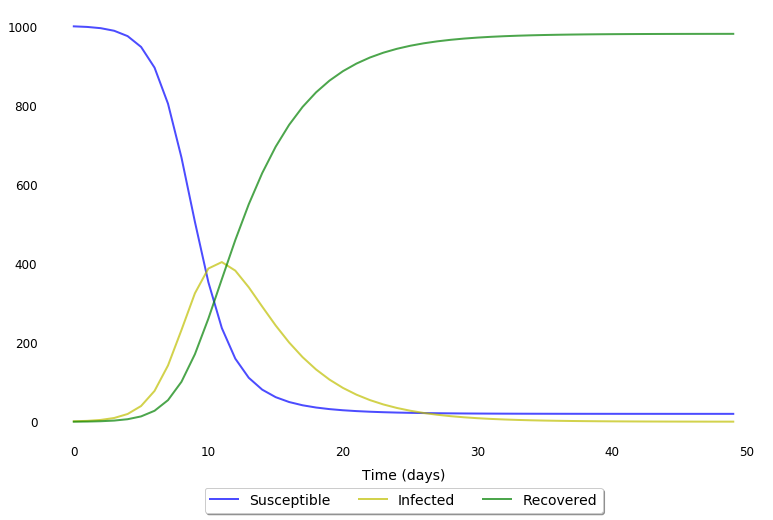

In [117]:
plot_sir(t, susceptible, infected, recovered)

This concludes the basic SIR model.